# Police shootings in the US

In [1]:
import pandas as pd 
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from bs4 import BeautifulSoup
import requests
from IPython.display import Image
%matplotlib inline
import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta

Populating the interactive namespace from numpy and matplotlib


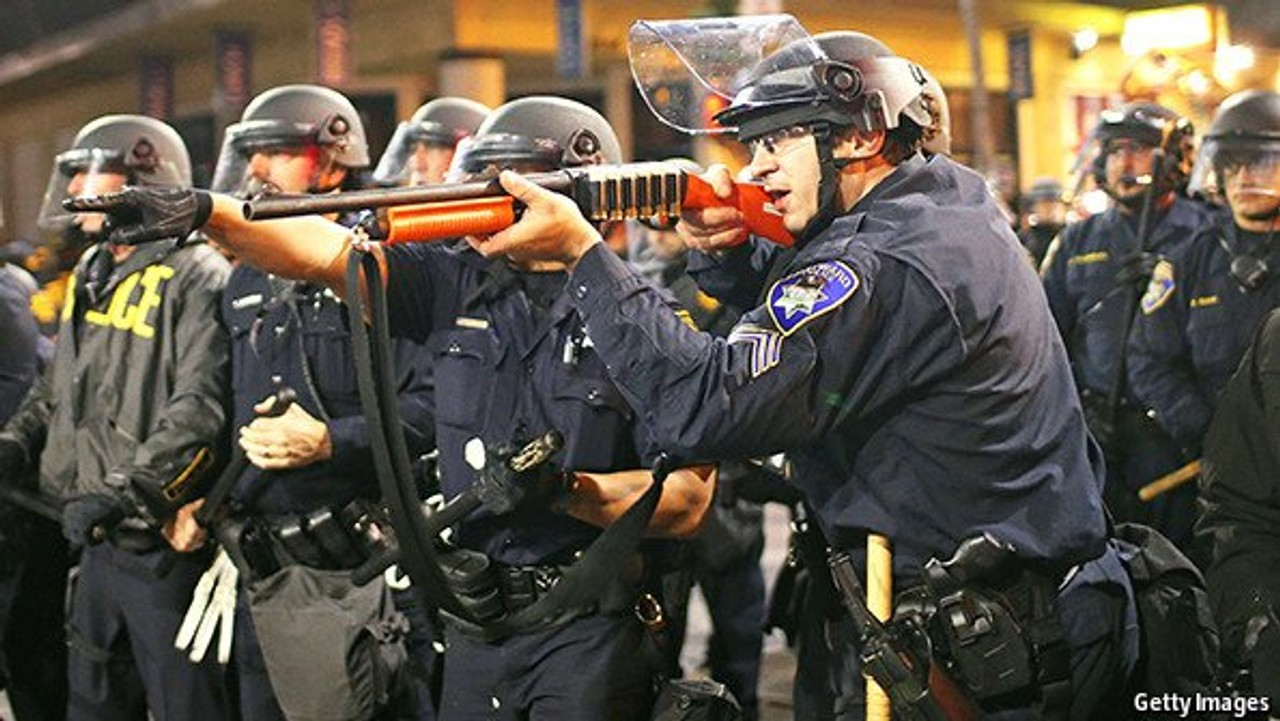

In [2]:
Image(filename="police shooting.jpg", width=500) 

In [3]:
url = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
ps = pd.read_csv(url)
ps.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


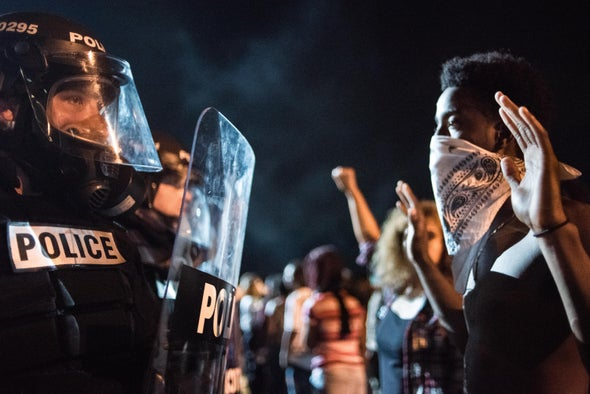

In [4]:
Image(filename="police shooting2.jpg", width=500) 

In [5]:
ps.count()

id                         6268
name                       6034
date                       6268
manner_of_death            6268
armed                      6060
age                        5987
gender                     6266
race                       5692
city                       6268
state                      6268
signs_of_mental_illness    6268
threat_level               6268
flee                       5880
body_camera                6268
longitude                  5963
latitude                   5963
is_geocoding_exact         6268
dtype: int64

In [6]:
df = ps[['date','name','manner_of_death','race','gender','state','city']]

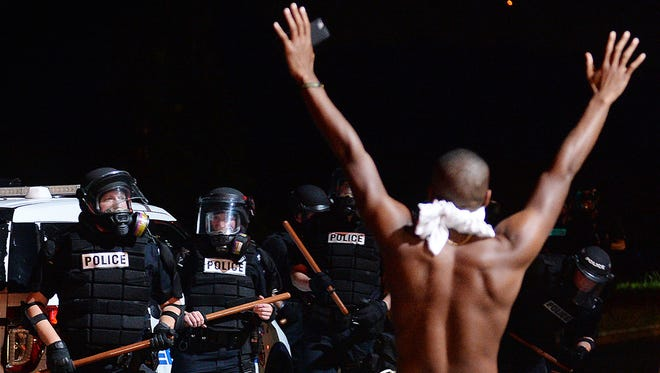

In [7]:
Image(filename="police shooting3.jpg", width=500) 

### Unique races in this data

In [8]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

## Black

In [9]:
df.loc[df.race == "B"]

,date,name,manner_of_death,race,gender,state,city
9,2015-01-06,Leslie Sapp III,shot,B,M,PA,Knoxville
11,2015-01-07,Ron Sneed,shot,B,M,TX,Freeport
12,2015-01-07,Hashim Hanif Ibn Abdul-Rasheed,shot,B,M,OH,Columbus
14,2015-01-07,Omarr Julian Maximillian Jackson,shot,B,M,LA,New Orleans
17,2015-01-08,Artago Damon Howard,shot,B,M,AR,Strong
...,...,...,...,...,...,...,...
6239,2021-04-18,NaN,shot,B,M,TX,Fort Worth
6243,2021-04-19,Doward Sylleen Baker,shot and Tasered,B,M,AL,Dothan
6244,2021-04-20,Ma’Khia Bryant,shot,B,F,OH,Columbus
6248,2021-04-21,Andrew Brown,shot,B,M,NC,Elizabeth City


## White

In [10]:
df.loc[df.race == "W"]

,date,name,manner_of_death,race,gender,state,city
1,2015-01-02,Lewis Lee Lembke,shot,W,M,OR,Aloha
3,2015-01-04,Matthew Hoffman,shot,W,M,CA,San Francisco
5,2015-01-04,Kenneth Joe Brown,shot,W,M,OK,Guthrie
7,2015-01-06,Brock Nichols,shot,W,M,KS,Assaria
8,2015-01-06,Autumn Steele,shot,W,F,IA,Burlington
...,...,...,...,...,...,...,...
6217,2021-04-13,Peyton Ham,shot,W,M,MD,Leonardtown
6225,2021-04-15,Jeffrey Guy Sacks,shot,W,M,FL,North Lauderdale
6238,2021-04-18,Bradley Michael Olsen,shot,W,M,MN,Burnsville
6254,2021-04-24,Benjamin Ridley,shot,W,M,OK,Webbers Falls


## Asian

In [11]:
df.loc[df.race == "A"]

,date,name,manner_of_death,race,gender,state,city
0,2015-01-02,Tim Elliot,shot,A,M,WA,Shelton
70,2015-01-28,Matautu Nuu,shot and Tasered,A,M,CA,Stockton
153,2015-03-01,Hung Trieu,shot,A,M,TX,Houston
160,2015-03-04,Carl Lao,shot,A,M,CA,Stockton
265,2015-04-08,Joseph Jeremy Weber,shot,A,M,CA,Sunnyvale
...,...,...,...,...,...,...,...
5642,2020-09-18,NaN,shot,A,M,CA,Stanton
5719,2020-10-18,Tutuila Pine Koonwaiyou,shot,A,M,UT,Tooele
5931,2020-12-28,Caillen Gentzler,shot,A,M,HI,Kaneohe
5942,2020-12-30,Peter K. England,shot,A,M,ID,Ammon


## Hispanic

In [12]:
df.loc[df.race == "H"]

,date,name,manner_of_death,race,gender,state,city
2,2015-01-03,John Paul Quintero,shot and Tasered,H,M,KS,Wichita
4,2015-01-04,Michael Rodriguez,shot,H,M,CO,Evans
6,2015-01-05,Kenneth Arnold Buck,shot,H,M,AZ,Chandler
20,2015-01-09,Andy Martinez,shot,H,M,TX,El Paso
22,2015-01-11,Brian Barbosa,shot,H,M,CA,South Gate
...,...,...,...,...,...,...,...
6193,2021-04-03,Gabriel Casso,shot,H,M,NY,New York
6222,2021-04-14,Marcelo Garcia,shot and Tasered,H,M,TX,Houston
6230,2021-04-16,Alex Garcia,shot,H,M,TX,San Antonio
6240,2021-04-19,Edgar Luis Tiraldo,shot,H,M,TX,Dallas


## Not Hispanic

In [13]:
df.loc[df.race == "N"]

,date,name,manner_of_death,race,gender,state,city
65,2015-01-27,Nicolas Leland Tewa,shot,N,M,AZ,Phoenix
213,2015-03-20,Justin Fowler,shot,N,M,AZ,Red Valley
295,2015-04-21,Daniel Covarrubias,shot,N,M,WA,Lakewood
438,2015-06-16,Joe Charboneau,shot,N,M,ND,Wood Lake
508,2015-07-12,Paul Castaway,shot,N,M,CO,Denver
...,...,...,...,...,...,...,...
5771,2020-11-01,Trifton Wacoche,shot,N,M,OK,Kenwood
5903,2020-12-15,Julian Avell Rose Cole,shot,N,M,OK,Glenpool
6090,2021-02-21,Dominic Lucas Koch,shot,N,M,MN,Anoka
6139,2021-03-14,Ryan White Mountain-Soft,shot,N,M,SD,McLaughlin


## Other

In [14]:
df.loc[df.race == "O"]

,date,name,manner_of_death,race,gender,state,city
38,2015-01-16,Zaki Shinwary,shot and Tasered,O,M,CA,Fremont
327,2015-04-30,Fridoon Zalbeg Nehad,shot,O,M,CA,San Diego
332,2015-05-03,Nadir Soofi,shot,O,M,TX,Garland
353,2015-05-12,Bruce Zalonka,shot and Tasered,O,M,HI,Honolulu
387,2015-05-27,Feras Morad,shot and Tasered,O,M,CA,Long Beach
523,2015-07-16,Mohammad Youssef Abdulazeez,shot,O,M,TN,Chattanooga
724,2015-09-23,Robert Berger,shot,O,M,UT,Salt Lake City
731,2015-09-24,Philip Quinn,shot,O,M,MN,St. Paul
754,2015-10-05,Omar Ali,shot,O,M,OH,Akron
813,2015-10-26,Kobvey Igbuhay,shot,O,M,FL,Tampa


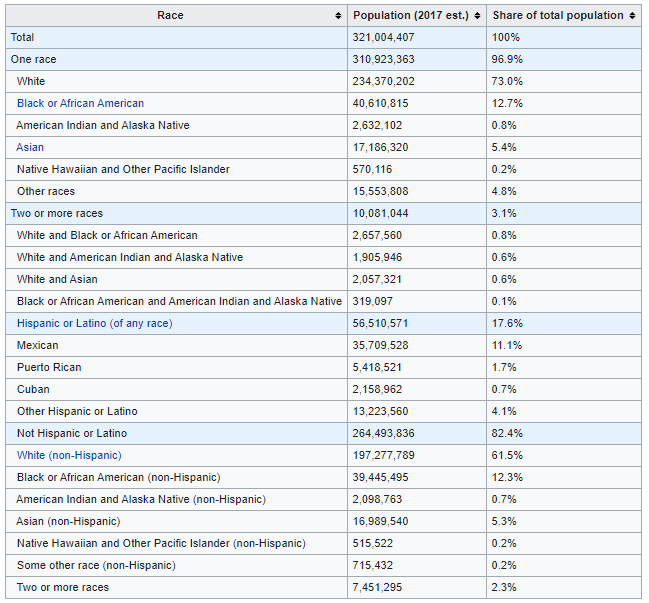

In [15]:
Image(filename='US race split.png',width=800)

In [16]:
link = 'https://abbreviations.yourdictionary.com/articles/state-abbrev.html'

In [17]:
pg = requests.get(link)
pg

<Response [200]>

In [18]:
soup = BeautifulSoup(pg.content, 'html.parser')
#print(soup.prettify())

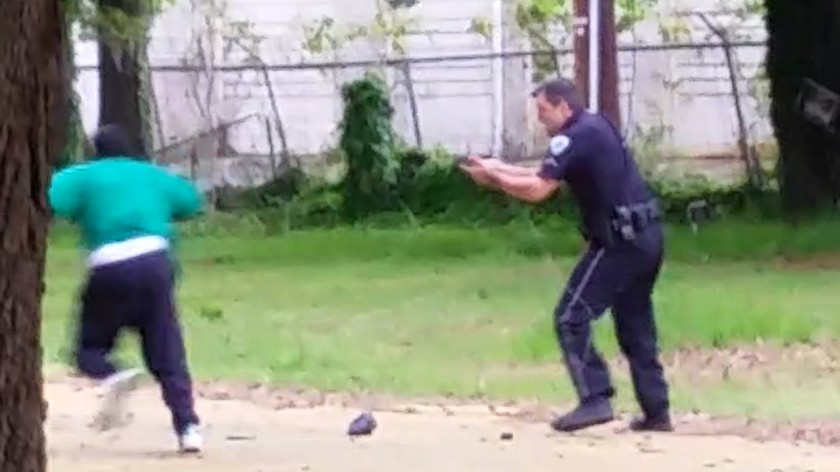

In [19]:
Image(filename="police shooting4.jpg", width=500) 

In [20]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [21]:
soup.find_all('td')[3].get_text()


'Alabama'

In [22]:
soup.find_all('td')[4].get_text()

'AL'

In [23]:
soup.find_all('td')[5].get_text()

'Ala.'

In [24]:
soup.find_all('td')[6].get_text()

'Alaska'

In [25]:
l = len(soup.find_all('td'))

In [26]:
print(l)

174


In [27]:
tb = []

In [28]:
tbl = []

In [29]:
exp = list(range(1,58))

In [30]:
for s in exp:
    if s == 51:
        s += 1       
               
    State = soup.find_all('td')[(s*3)].get_text()
    tb.append(State)
    s += 1


In [31]:
a = pd.DataFrame(tb, columns=["State"])

In [32]:
a = a.loc[0:56]

In [33]:
for s in exp:
    if s == 51:
        s += 1       
               
    Abrev = soup.find_all('td')[(s*3)+1].get_text()
    tbl.append(Abrev)
    s += 1


In [34]:
b = pd.DataFrame(tbl, columns=["state"])

In [35]:
b = b.loc[0:56]

In [36]:
df1 = pd.concat([b, a], axis=1)

In [37]:
df1

,state,State
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,FL,Florida
9,GA,Georgia


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
type(df1)

pandas.core.frame.DataFrame

In [40]:
data = {'Race' : ['Asian','White','Hispanic','Black','Other','N/A','Not Hispanic'],
 'race' : ['A','W','H','B','O','nan','N']
 }

In [41]:
data

{'Race': ['Asian',
  'White',
  'Hispanic',
  'Black',
  'Other',
  'N/A',
  'Not Hispanic'],
 'race': ['A', 'W', 'H', 'B', 'O', 'nan', 'N']}

In [42]:
df2 = pd.DataFrame(data=data)
df2

,Race,race
0,Asian,A
1,White,W
2,Hispanic,H
3,Black,B
4,Other,O
5,N/A,nan
6,Not Hispanic,N


In [43]:
df  = df.merge(df1, left_on='state', right_on='state')

In [44]:
df  = df.merge(df2, left_on='race', right_on='race')

In [45]:
df['Year'] = pd.DatetimeIndex(df['date']).year

In [46]:
df.rename(columns = {'date' : 'Date','name': 'Name','manner_of_death': 'Manner of Death','race':'Race Letter','gender':'Gender','state':'State Abbreviation','city':'City','State':'State','Race':'Race','Year':'Year'}, inplace = True)

In [47]:
df = df[['Date','Year','Name','Manner of Death','Race','Gender','State','City']]

In [48]:
df.head(15)

,Date,Year,Name,Manner of Death,Race,Gender,State,City
0,2015-01-02,2015,Tim Elliot,shot,Asian,M,Washington,Shelton
1,2016-10-11,2016,Michael L. Taylor,shot,Asian,M,Washington,Seattle
2,2017-06-14,2017,Tommy Le,shot and Tasered,Asian,M,Washington,Burien
3,2017-07-08,2017,Michael Anthony Rude,shot,Asian,M,Washington,Lacey
4,2018-12-31,2018,Iosia Faletogo,shot,Asian,M,Washington,Seattle
5,2019-02-19,2019,Clayton Joseph,shot,Asian,M,Washington,Vancouver
6,2019-05-31,2019,Jesse Sarey,shot,Asian,M,Washington,Auburn
7,2020-01-10,2020,Clando Anitok,shot and Tasered,Asian,M,Washington,Spokane
8,2020-01-21,2020,Sok Chin Son,shot and Tasered,Asian,M,Washington,Lacey
9,2015-01-28,2015,Matautu Nuu,shot and Tasered,Asian,M,California,Stockton


In [49]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_the_United_States#Race'

In [50]:
dt = requests.get(url)
dt

<Response [200]>

In [51]:
soup = BeautifulSoup(dt.content, 'html.parser')


In [52]:
for i in range(len(soup.find_all('span'))):
    ab = soup.find_all('span')[i].get_text()
    i+=1


In [53]:
K = soup.find_all('span')[56].get_text()
print(K)

Indigenous peoples


In [54]:
H = soup.find_all('th')[56].get_text()
print(H)

Race



Text(0.5, 1.0, 'Police shooting and Taser')

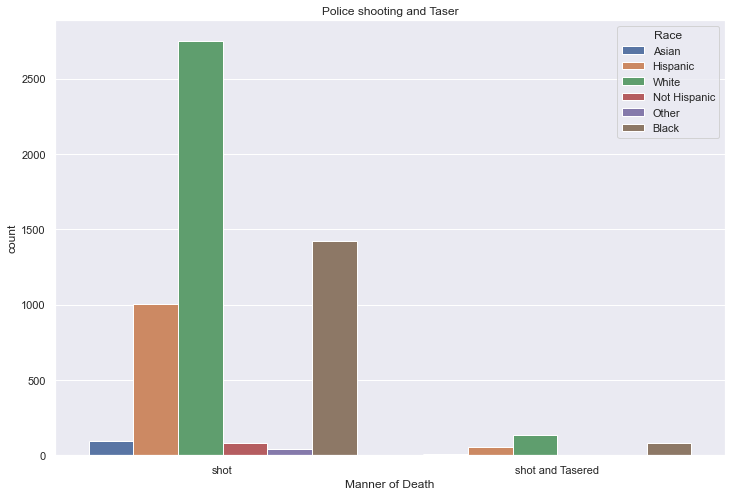

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x='Manner of Death', hue='Race',data=df)
plt.title('Police shooting and Taser')

In [56]:
df['Manner of Death'].value_counts()

shot                5396
shot and Tasered     296
Name: Manner of Death, dtype: int64

Text(0.5, 1.0, 'Police shooting and Taser')

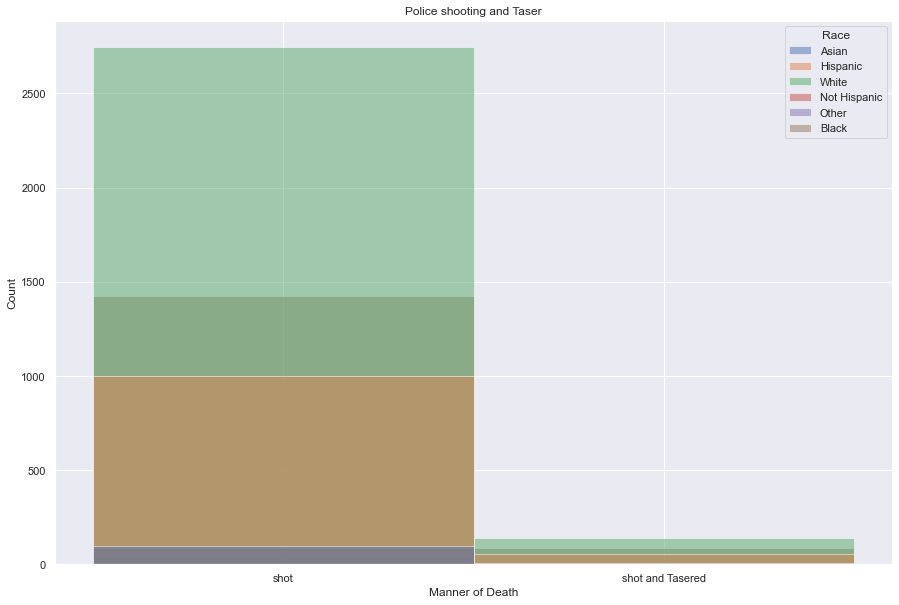

In [57]:
f, ax = plt.subplots(figsize=(15, 10))

sns.histplot(
    df,
    x="Manner of Death"
    ,hue="Race",   
    linewidth=.5   
)
plt.title('Police shooting and Taser')

In [58]:
df['Race'].value_counts()

White           2887
Black           1508
Hispanic        1058
Asian            104
Not Hispanic      88
Other             47
Name: Race, dtype: int64

<AxesSubplot:>

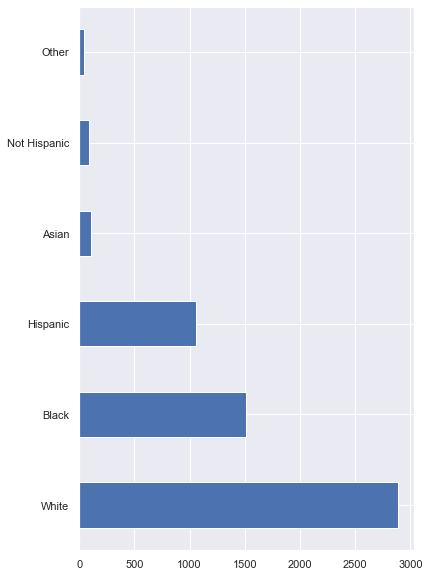

In [59]:
df['Race'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [60]:
df['Gender'].value_counts()

M    5425
F     266
Name: Gender, dtype: int64

In [61]:
df['Year'].value_counts()

2015    971
2017    909
2016    906
2018    902
2020    900
2019    885
2021    219
Name: Year, dtype: int64

<AxesSubplot:>

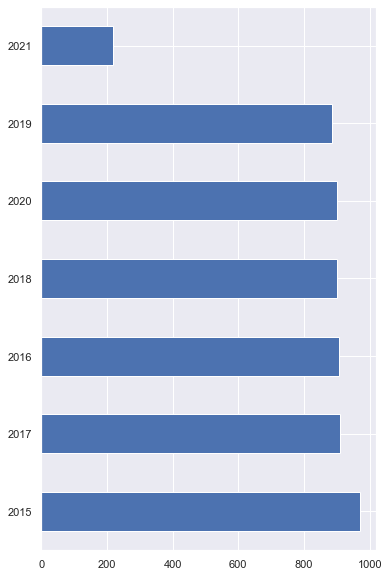

In [62]:
df['Year'].value_counts().head(30).plot(kind='barh', figsize=(6,10))